#Deep Learning based Temporal Causal Discovery from Non-stationary Non-linear Time Series Data (Arctic Sea Ice Dataset)


This notebook contains the proposed model. Here we have developed the proposed Causal Conv2D layer and the optimization function.

The functions to visualize the predicted causal graph are available after the model training codes. The predicted graph is compared with ground truth using an adjacency matrix (array).   

In this notebook, we applied the proposed model to the Arctic Sea Ice dataset to generate a full causal graph and summary graph.

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
!pip install cdt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.1/921.1 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7393 sha256=14994defe448b7e9786195275f2f1331f2c394daf26dbaacf70a7baa5e2416cf
  Stored in directory: /root/.cache/pip/wheels/a9/8a/bd/81082387151853ab8b6b3ef33426e98f5cbfebc3c397a9d4d0
  Created wheel for skrebate: filename=skrebate-0.62-py3-none-any.whl size=29253 sha256=f083838e1e4bd6562ad3be8ef4a2de84be2ac5a4a0406a68e6f143e305ea8431
  Stored in directory: /root/.cache/pip/wheels/dd/67/40/683074a684607162bd0e34dcf7ccdfcab5861c3b2a83286f3a
Successfully built GPUtil skrebate


In [ ]:
import cdt

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


In [ ]:
df_2D_data_sea_ice = pd.read_csv('/content/Arctic_Sea_Ice_Data_1980_2018.csv')
#df_2D_data_TKE = df_2D_data_TKE.drop('Date', axis=1)
df_2D_data_sea_ice

,Surface sensible+latent heat flux (Wm**-2),Surface downwelling shortwave flux (Wm**-2),Surface downwelling longwave flux (Wm**-2),Sea level pressure (hPa),Total precipitation (mm/day),Relative humidity averaged 1000-300hPa (%),U wind at 10 m (m s**-1),V wind at 10 m (m s**-1),TotalArc,Total cloud cover (%),Total column cloud water (g m**-2),GH_mean
0,-14.515746,3.397134,188.566474,1019.807404,0.858821,72.950740,-0.309648,-0.308690,15053607.0,84.543343,39.070621,5880.449752
1,-11.155385,18.953971,194.381967,1013.952864,0.831777,73.521670,0.717918,0.132610,16074814.0,83.167001,39.984280,5861.477613
2,-15.824442,71.869876,197.269891,1018.900662,0.669739,74.499365,-0.218005,-0.229795,16207072.0,81.490186,34.143657,5912.337135
3,-24.116219,159.062774,216.452459,1016.864319,0.776846,71.982550,-0.188627,-0.334186,15546525.0,79.284692,41.757531,5984.780309
4,-31.230077,225.084615,260.700879,1017.970033,0.840839,68.851454,-1.038648,-0.611375,14080852.0,80.420287,63.752542,6128.435629
...,...,...,...,...,...,...,...,...,...,...,...,...
463,-33.515496,128.156161,308.955178,1008.433874,1.693416,71.542345,0.380871,-0.040807,5622998.0,81.062949,119.973755,6218.951904
464,-26.828923,71.000427,283.720978,1011.229922,1.571682,72.186382,0.590761,0.050951,4834953.0,79.328931,94.030741,6134.249281
465,-25.604347,25.377637,257.384245,1009.500666,1.431546,74.109000,0.275876,-0.000186,6824601.0,81.066008,71.868710,6017.538401
466,-22.480758,5.405305,221.224509,1015.854419,1.062975,73.686454,-0.279709,-0.266170,10279618.0,84.034796,56.764820,5948.270480


In [ ]:
df_2D_data_sea_ice.columns

Index(['Surface sensible+latent heat flux (Wm**-2)',
       'Surface downwelling shortwave flux (Wm**-2)',
       'Surface downwelling longwave flux (Wm**-2)',
       'Sea level pressure (hPa)', 'Total precipitation (mm/day)',
       'Relative humidity averaged 1000-300hPa (%)',
       'U wind at 10 m (m s**-1)', 'V wind at 10 m (m s**-1)', 'TotalArc',
       'Total cloud cover (%)', 'Total column cloud water (g m**-2)',
       'GH_mean'],
      dtype='object')

In [ ]:
df_2D_data_sea_ice.columns = ['HFLX','SW','LW','SLP', 'PRE','RH','U10m', 'V10m', 'ICE', 'CC', 'CW','GH']
df_2D_data_sea_ice = df_2D_data_sea_ice[['HFLX','CC','SW','U10m','SLP', 'PRE','ICE', 'LW','V10m','CW','GH','RH']]

In [ ]:
df_2D_data_sea_ice.columns

Index(['HFLX', 'CC', 'SW', 'U10m', 'SLP', 'PRE', 'ICE', 'LW', 'V10m', 'CW',
       'GH', 'RH'],
      dtype='object')

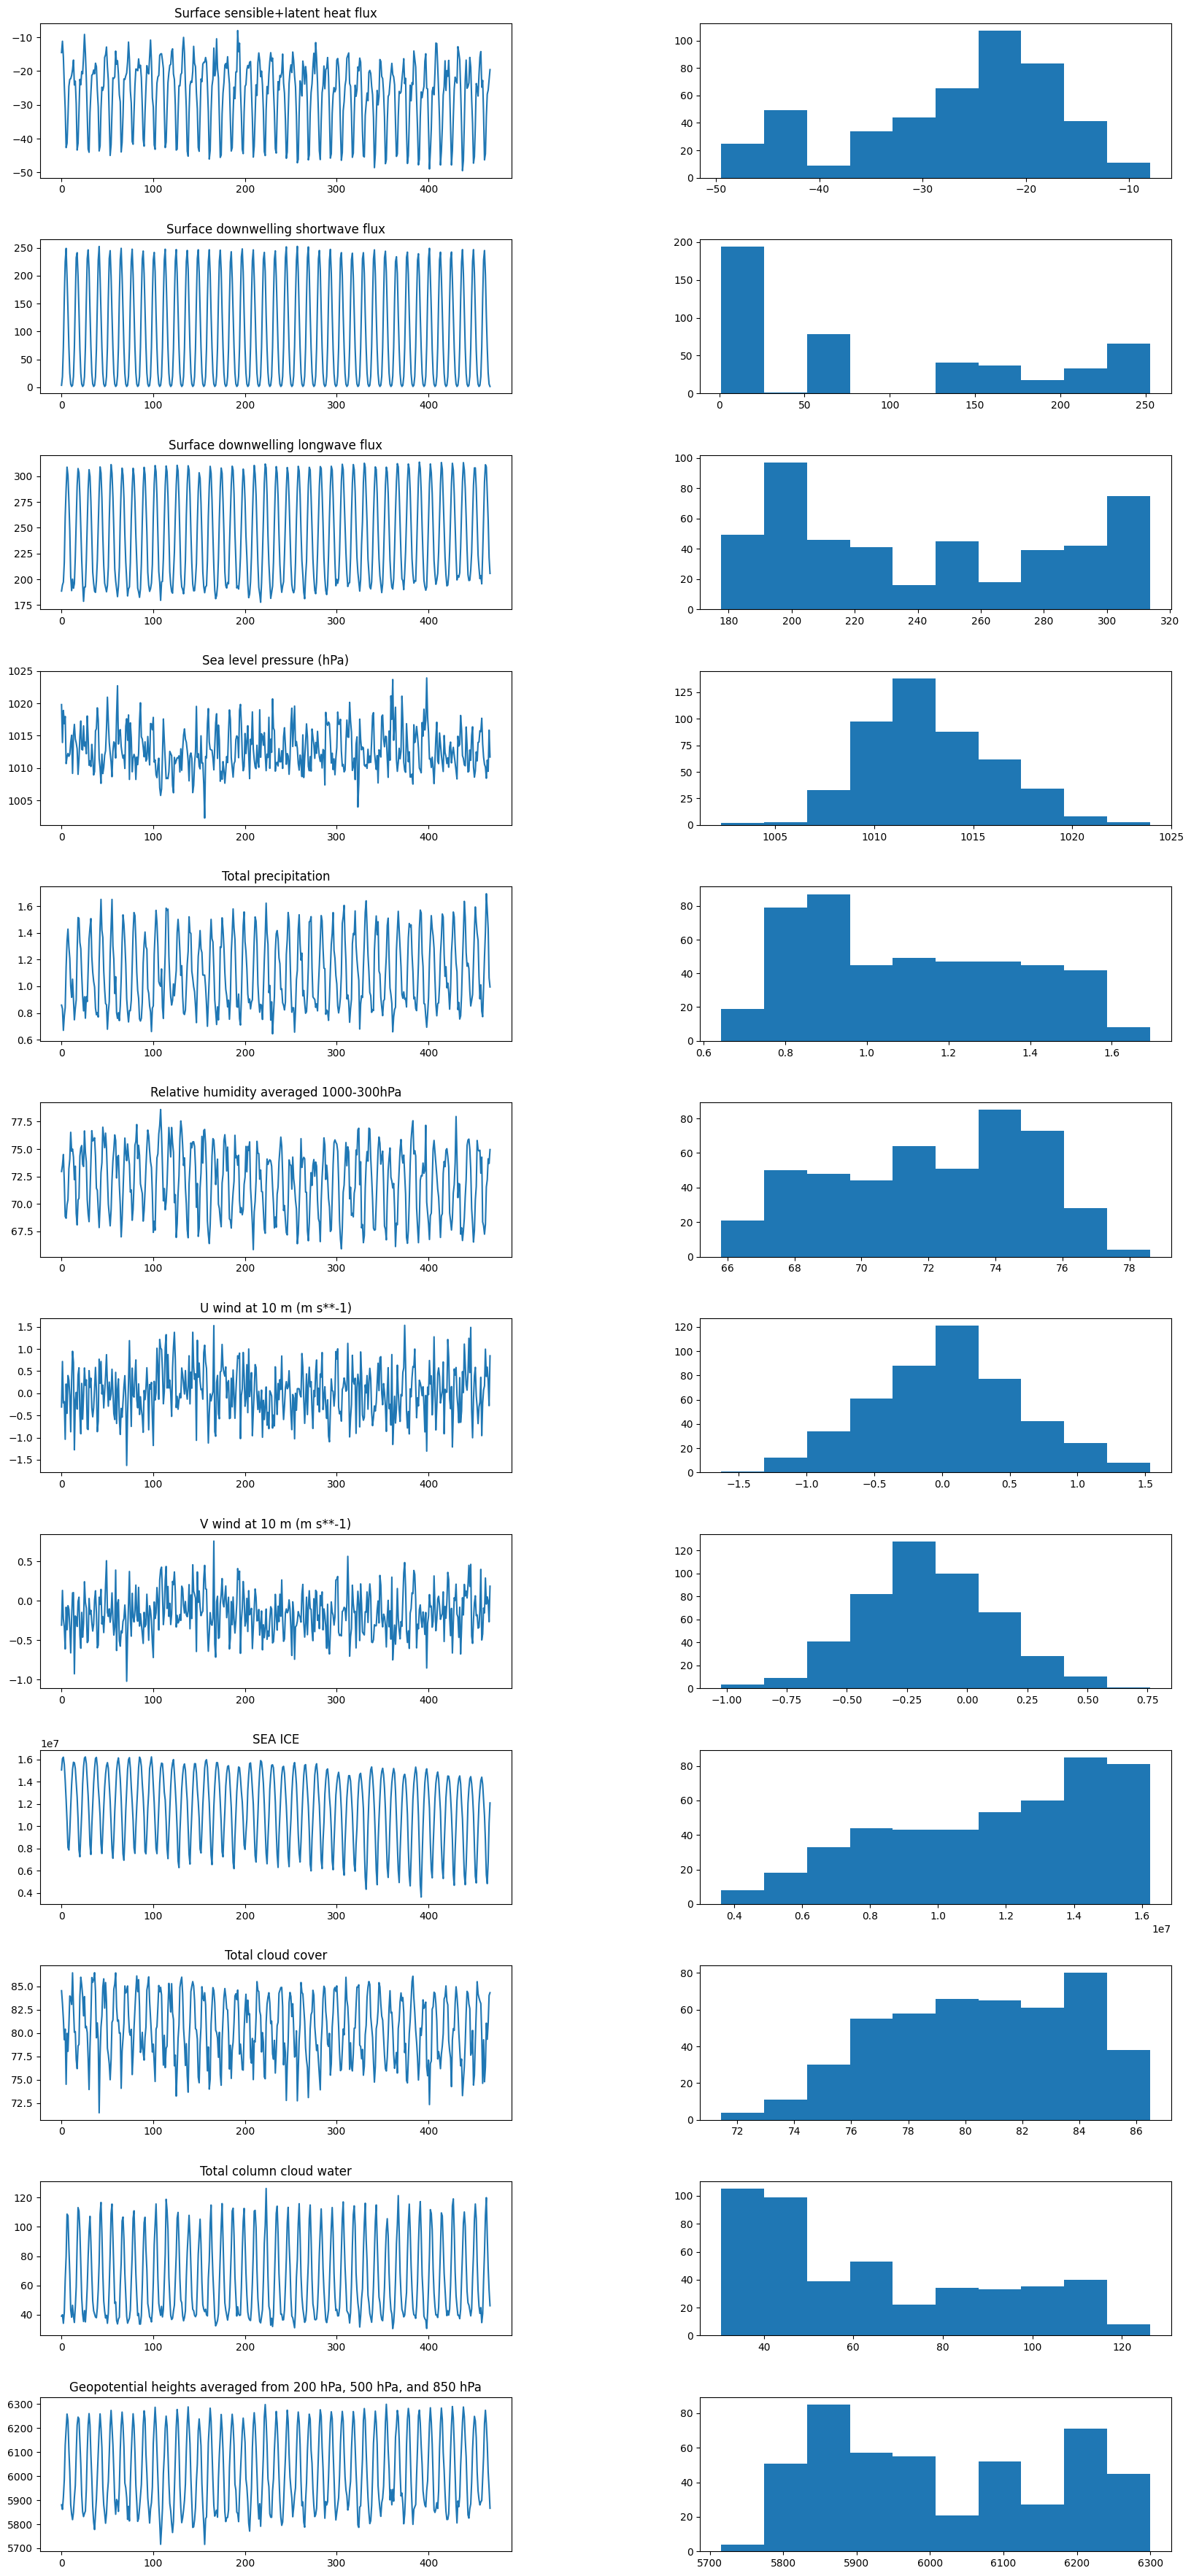

In [ ]:
from matplotlib import pyplot
series_HFLX = df_2D_data_sea_ice['HFLX']
series_SW = df_2D_data_sea_ice['SW']
series_LW = df_2D_data_sea_ice['LW']
series_SLP = df_2D_data_sea_ice['SLP']
series_PRE = df_2D_data_sea_ice['PRE']
series_RH = df_2D_data_sea_ice['RH']
series_U10m = df_2D_data_sea_ice['U10m']
series_V10m = df_2D_data_sea_ice['V10m']
series_ICE = df_2D_data_sea_ice['ICE']
series_CC = df_2D_data_sea_ice['CC']
series_CW = df_2D_data_sea_ice['CW']
series_GH = df_2D_data_sea_ice['GH']



fig, ax = pyplot.subplots(nrows=12, ncols=2, figsize=(20, 45),
                       gridspec_kw={
                       'wspace': 0.4,
                       'hspace': 0.4})

# line plot and histogram
ax[0][0].plot(series_HFLX)
ax[0][0].set_title('Surface sensible+latent heat flux')
ax[0][1].hist(series_HFLX)

ax[1][0].plot(series_SW)
ax[1][0].set_title('Surface downwelling shortwave flux')
ax[1][1].hist(series_SW)

ax[2][0].plot(series_LW)
ax[2][0].set_title('Surface downwelling longwave flux')
ax[2][1].hist(series_LW)

ax[3][0].plot(series_SLP)
ax[3][0].set_title('Sea level pressure (hPa)')
ax[3][1].hist(series_SLP)

ax[4][0].plot(series_PRE)
ax[4][0].set_title('Total precipitation')
ax[4][1].hist(series_PRE)

ax[5][0].plot(series_RH)
ax[5][0].set_title('Relative humidity averaged 1000-300hPa')
ax[5][1].hist(series_RH)

ax[6][0].plot(series_U10m)
ax[6][0].set_title('U wind at 10 m (m s**-1)')
ax[6][1].hist(series_U10m)

ax[7][0].plot(series_V10m)
ax[7][0].set_title('V wind at 10 m (m s**-1)')
ax[7][1].hist(series_V10m)

ax[8][0].plot(series_ICE)
ax[8][0].set_title('SEA ICE')
ax[8][1].hist(series_ICE)

ax[9][0].plot(series_CC)
ax[9][0].set_title('Total cloud cover')
ax[9][1].hist(series_CC)

ax[10][0].plot(series_CW)
ax[10][0].set_title('Total column cloud water')
ax[10][1].hist(series_CW)

ax[11][0].plot(series_GH)
ax[11][0].set_title('Geopotential heights averaged from 200 hPa, 500 hPa, and 850 hPa')
ax[11][1].hist(series_GH)


pyplot.show()

#Data Pre-processing

In [ ]:
import numpy as np
import pandas as pd

def data_preprocessing(data, max_lag=5):
  from sklearn.preprocessing import MinMaxScaler

  #convert to numpy array
  syn_data_np = data.to_numpy()

  #normalize the dataset
  scaler_X = MinMaxScaler(feature_range=(0, 1))
  syn_data_np_nor = scaler_X.fit_transform(syn_data_np)
  syn_data_np = syn_data_np_nor

  #transform into 2D data
  syn_data_np_T= syn_data_np.T
  syn_data_pro = np.zeros((syn_data_np.shape[0]-max_lag,syn_data_np.shape[1],(max_lag+1)))
  for i in range(0, (syn_data_np.shape[0]-max_lag)):
    syn_data_pro[i,:,:]= syn_data_np_T[:, i:i+(max_lag+1)]
  syn_data_2d = np.expand_dims(syn_data_pro, axis =-1)

  #make datafrom with normalized data
  syn_data_nor_df =pd.DataFrame(data = syn_data_np,
                  columns = data.columns)

  #transform normalized data into 1D shape with lagged and current time values
  size_1d = syn_data_np.shape[1]*(max_lag+1)
  print(size_1d)
  syn_data_1d = np.zeros((syn_data_np.shape[0]-max_lag,size_1d))
  for i in range(0, (syn_data_np.shape[0]-max_lag)):
    for j in range(0,(max_lag+1)):
      j_end = j * syn_data_np.shape[1]
      syn_data_1d[i,j_end:j_end+syn_data_np.shape[1]]= syn_data_np[i+j, :]

  #transform non-normalized data into 1D shape with lagged and current time values
  syn_data_np_2 = data.to_numpy()
  syn_data_1d_not_norm = np.zeros((syn_data_np_2.shape[0]-max_lag,size_1d))
  for i in range(0, (syn_data_np_2.shape[0]-max_lag)):
    for j in range(0,(max_lag+1)):
      j_end = j * syn_data_np_2.shape[1]
      syn_data_1d_not_norm[i,j_end:j_end+syn_data_np_2.shape[1]]= syn_data_np_2[i+j, :]


  return syn_data_np_nor, syn_data_2d, syn_data_nor_df, syn_data_1d,  syn_data_1d_not_norm

In [ ]:
SEA_ICE_np_nor, SEA_ICE_2d, SEA_ICE_nor_df, SEA_ICE_1d, SEA_ICE_1d_not_norm = data_preprocessing(df_2D_data_sea_ice, max_lag=12)

156


In [ ]:
SEA_ICE_np_nor.shape, SEA_ICE_2d.shape, SEA_ICE_nor_df.shape

((468, 12), (456, 12, 13, 1), (468, 12))

In [ ]:
data_y_SEA_ICE = SEA_ICE_np_nor[12:,:]
data_y_SEA_ICE.shape

(456, 12)

# Proposed Model

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout, AveragePooling2D, LSTM, Activation, ConvLSTM2D, TimeDistributed, Input, Reshape
from keras.layers import UpSampling1D, Conv2DTranspose, UpSampling2D, Conv1D, AveragePooling1D, LeakyReLU
from keras.models import Model
from keras.optimizers import SGD
from keras import callbacks
import keras.backend as K
import tensorflow as tf
from keras.layers import concatenate
from keras.regularizers import l1, l2
from time import time

keras.utils.set_random_seed(1001)

In [ ]:
class CausalConv2D(tf.keras.layers.Layer):
    def __init__(self, num_outputs, counter, *args, **kwargs):
        super(CausalConv2D, self).__init__()
        self.conv2d = tf.keras.layers.Conv2D(*args, **kwargs)
        self.num_outputs = num_outputs
        self.counter = counter

    def build(self, input_shape):
        self.W=self.add_weight(name='kernel',
                           shape=(input_shape[1], input_shape[2],input_shape[3], 1),
                           #initializer = keras.initializers.RandomUniform(minval=0.05, maxval=0.5),
                           initializer = tf.keras.initializers.glorot_uniform(seed=8),
                           trainable=True)
        self.mask = np.ones(shape=self.W.shape)
        print(self.W)
        self.mask[self.counter,(input_shape[2]-1),...] = 0.0

    def get_weights(self):
        return super().get_weights()

    def call(self, inputs):
        self.W.assign(tf.math.multiply(self.W, self.mask))
        return self.conv2d.convolution_op(inputs, self.W)

In [ ]:
# 2D
def get_model_2d(input_dims):
    input_batch = Input(shape = input_dims)

    conv_model = Sequential()
    conv_model = Conv2D(filters=4, kernel_size=1, strides=(1,1), padding='valid', activation="linear", name='conv1')(input_batch)
    conv_model = tf.math.reduce_mean(conv_model, axis=-1)
    conv_model = Reshape((12, 13, 1))(conv_model)
    pooled_outputs = []
    for i in range(0, 12):
      layer = CausalConv2D(filters=1, kernel_size=(12,13), num_outputs=1, counter=i, padding='valid', activation="relu",)(conv_model)
      pooled_outputs.append(layer)
    output = concatenate(pooled_outputs)
    output = Flatten()(output)

    model = Model(inputs=input_batch, outputs=output, name='cpred')

    return model

In [ ]:
# with gradient tape

class CausalNNModel(object):
    def __init__(self,
                 dims,
                 alpha=0.0,
                 rho = 1.0,
                 rho_max = 10e20,
                 h_tol = 1e-8,
                 init='glorot_uniform'):

        super(CausalNNModel, self).__init__()

        self.dims = dims
        self.n_stacks = len(self.dims) - 1
        self.alpha = alpha
        self.rho = rho
        self.h_p = np.Inf
        self.rho_max = rho_max
        self.h_tol = h_tol
        self.model_2d = get_model_2d(self.dims)
        print("====Model created=====")

        self.model = Model(inputs=self.model_2d.input, outputs=self.model_2d.output)


    def custom_loss_function(self, y_true, y_pred):
      mse = keras.losses.mean_squared_error(y_true, y_pred)
      h_val = self.causal_loss_h()
      h_loss = 0.5 * self.rho * h_val * h_val + self.alpha * h_val
      lambda1 = 0.2
      adj_mat = self.get_mat()
      sparse_loss = lambda1 * tf.math.reduce_sum(tf.abs(adj_mat))
      print('MSE Loss is: {}, h Loss is: {}, L1 loss: {}, Total Loss is: {}'.format(tf.reduce_mean(mse), h_loss, sparse_loss, tf.reduce_mean(mse)+h_loss))
      return mse + h_loss + sparse_loss

    def causal_loss_h(self):
      mat = self.get_mat()
      h_val = self.h_acy_1(mat[:, 144:])
      return h_val

    def get_mat(self):
      w1_2d_s = self.model.get_layer(index=-14).get_weights()
      w2_2d_s = self.model.get_layer(index=-13).get_weights()
      w3_2d_s = self.model.get_layer(index=-12).get_weights()
      w4_2d_s = self.model.get_layer(index=-11).get_weights()
      w5_2d_s = self.model.get_layer(index=-10).get_weights()
      w6_2d_s = self.model.get_layer(index=-9).get_weights()
      w7_2d_s = self.model.get_layer(index=-8).get_weights()
      w8_2d_s = self.model.get_layer(index=-7).get_weights()
      w9_2d_s = self.model.get_layer(index=-6).get_weights()
      w10_2d_s = self.model.get_layer(index=-5).get_weights()
      w11_2d_s = self.model.get_layer(index=-4).get_weights()
      w12_2d_s = self.model.get_layer(index=-3).get_weights()
      arr1_2d_s = np.expand_dims(np.squeeze(np.array(w1_2d_s), axis=(0,3,4)).flatten('F'), axis=0)
      arr2_2d_s = np.expand_dims(np.squeeze(np.array(w2_2d_s), axis=(0,3,4)).flatten('F'), axis=0)
      arr3_2d_s = np.expand_dims(np.squeeze(np.array(w3_2d_s), axis=(0,3,4)).flatten('F'), axis=0)
      arr4_2d_s = np.expand_dims(np.squeeze(np.array(w4_2d_s), axis=(0,3,4)).flatten('F'), axis=0)
      arr5_2d_s = np.expand_dims(np.squeeze(np.array(w5_2d_s), axis=(0,3,4)).flatten('F'), axis=0)
      arr6_2d_s = np.expand_dims(np.squeeze(np.array(w6_2d_s), axis=(0,3,4)).flatten('F'), axis=0)
      arr7_2d_s = np.expand_dims(np.squeeze(np.array(w7_2d_s), axis=(0,3,4)).flatten('F'), axis=0)
      arr8_2d_s = np.expand_dims(np.squeeze(np.array(w8_2d_s), axis=(0,3,4)).flatten('F'), axis=0)
      arr9_2d_s = np.expand_dims(np.squeeze(np.array(w9_2d_s), axis=(0,3,4)).flatten('F'), axis=0)
      arr10_2d_s = np.expand_dims(np.squeeze(np.array(w10_2d_s), axis=(0,3,4)).flatten('F'), axis=0)
      arr11_2d_s = np.expand_dims(np.squeeze(np.array(w11_2d_s), axis=(0,3,4)).flatten('F'), axis=0)
      arr12_2d_s = np.expand_dims(np.squeeze(np.array(w12_2d_s), axis=(0,3,4)).flatten('F'), axis=0)

      mat_2d_s = np.concatenate((arr1_2d_s, arr2_2d_s, arr3_2d_s, arr4_2d_s, arr5_2d_s,arr6_2d_s,
                                 arr7_2d_s, arr8_2d_s, arr9_2d_s, arr10_2d_s,arr11_2d_s, arr12_2d_s))
      #print(mat_2d_s)
      return mat_2d_s

    def h_acy_1(self, A):
      n_var = A.shape[0]
      h = tf.linalg.trace(tf.linalg.expm(A * A)) - n_var
      return h


    def h_acy(self, A):
      '''Calculate the constraint of A ensure that it's a DAG'''
      n_var = A.shape[0]
      M = tf.eye(n_var, num_columns = n_var) + A/n_var
      E = M
      for _ in range(n_var - 2):
        E = tf.linalg.matmul(E, M)
      h = tf.math.reduce_sum(tf.transpose(E) * M) - n_var
      return h

    def compile(self, optimizer='adam'):
        self.model.compile(optimizer=optimizer, loss= self.custom_loss_function) # ['mse', self.causal_loss()])

    def fit(self, x, y=None, maxiter=100, batch_size=512, save_dir='./results/temp'):
        t1 = time()

        # logging file
        import csv
        logfile = open(save_dir + '/causalnn_log.csv', 'w')
        logwriter = csv.DictWriter(logfile, fieldnames=['iter','loss'])
        logwriter.writeheader()
        train_loader = tf.data.Dataset.from_tensor_slices((x, y)).batch(batch_size)
        optimizer = tf.keras.optimizers.Adam(1e-2)
        w1_2d_s = self.model.get_layer(index=-6).get_weights()
        arr1_2d_s = np.expand_dims(np.squeeze(np.array(w1_2d_s), axis=(0,3,4)).flatten('F'), axis=0)


        for epoch in range(int(maxiter)):
          print('Epoch: {}', epoch)
          h_n = None
          for (x, y) in train_loader:
            #eval loss and compute gradients
            with tf.GradientTape() as tape:
              tape.watch(self.model.trainable_variables)
              #passing through neural network
              output = self.model(x)
              #calculate loss
              loss = self.custom_loss_function(y, output)
              gradients = tape.gradient(loss, self.model.trainable_variables)
              optimizer.apply_gradients(zip(gradients, self.model.trainable_variables))
              h_n = self.causal_loss_h()

          if h_n > 0.25 * self.h_p:
                self.rho = self.rho*1.1
          self.h_p = h_n
          print('New h_val is :', h_n)
          self.alpha += self.rho * self.h_p

          if self.h_p <= self.h_tol or self.rho >= self.rho_max:
            print('Before the loop end # h_val is: {}, rho is: {}'.format(self.h_p, self.rho))
            break


        # save the trained model
        logfile.close()
        file_name  = "/CausalNN_model_final_" + str(round(time()))+ ".h5"
        print('saving model to:', save_dir + file_name)
        self.model.save_weights(save_dir + file_name)

        w1_2d_s_1 = self.model.get_layer(index=-6).get_weights()
        arr1_2d_s_1 = np.expand_dims(np.squeeze(np.array(w1_2d_s_1), axis=(0,3,4)).flatten('F'), axis=0)

        y_pred = self.model.predict(x)
        adj_mat = self.get_mat()

        print('The conv layer 1 weights before training :', arr1_2d_s)
        print('The conv layer 1 weights after training :', arr1_2d_s_1)

        return y_pred, adj_mat

#Model creation and training:

In [ ]:
keras.utils.set_random_seed(1001)

cnnmodel = CausalNNModel(dims=SEA_ICE_2d.shape[1:])

<tf.Variable 'causal_conv2d/kernel:0' shape=(12, 13, 1, 1) dtype=float32, numpy=
array([[[[ 0.00678216]],

        [[ 0.02106266]],

        [[-0.04533595]],

        [[-0.07571331]],

        [[-0.08914268]],

        [[-0.04121141]],

        [[-0.01271532]],

        [[ 0.13715567]],

        [[-0.08951646]],

        [[ 0.07305133]],

        [[-0.01537511]],

        [[-0.01553614]],

        [[ 0.08134723]]],


       [[[-0.05744087]],

        [[ 0.0842122 ]],

        [[-0.07021967]],

        [[ 0.02553192]],

        [[ 0.06698097]],

        [[ 0.08391285]],

        [[-0.1338631 ]],

        [[ 0.03451833]],

        [[-0.12367225]],

        [[-0.02890666]],

        [[ 0.06134838]],

        [[ 0.02295567]],

        [[ 0.12820043]]],


       [[[-0.05284869]],

        [[-0.07361385]],

        [[-0.06092961]],

        [[ 0.03704581]],

        [[-0.03204104]],

        [[-0.08398725]],

        [[ 0.00564572]],

        [[-0.07632387]],

        [[-0.0977208 ]],

     

In [ ]:
cnnmodel.model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 12, 13, 1)]          0         []                            
                                                                                                  
 conv1 (Conv2D)              (None, 12, 13, 4)            8         ['input_1[0][0]']             
                                                                                                  
 tf.math.reduce_mean (TFOpL  (None, 12, 13)               0         ['conv1[0][0]']               
 ambda)                                                                                           
                                                                                                  
 reshape (Reshape)           (None, 12, 13, 1)            0         ['tf.math.reduce_mean[0][0

In [ ]:
cnnmodel.compile()

In [ ]:
y_pred, mat = cnnmodel.fit(x=SEA_ICE_2d, y=data_y_SEA_ICE, maxiter=30, batch_size=16, save_dir='/content/')

Epoch: {} 0
MSE Loss is: 0.36095714569091797, h Loss is: 2.1400228433776647e-05, L1 loss: 26.39181900024414, Total Loss is: 0.36097854375839233
MSE Loss is: 0.2797676622867584, h Loss is: 2.9769707907689735e-05, L1 loss: 26.36041259765625, Total Loss is: 0.27979743480682373
MSE Loss is: 0.209150493144989, h Loss is: 4.234720836393535e-05, L1 loss: 26.515583038330078, Total Loss is: 0.20919284224510193
MSE Loss is: 0.13562661409378052, h Loss is: 6.15923636360094e-05, L1 loss: 26.810895919799805, Total Loss is: 0.1356882005929947
MSE Loss is: 0.07700139284133911, h Loss is: 8.913048077374697e-05, L1 loss: 27.357669830322266, Total Loss is: 0.07709052413702011
MSE Loss is: 0.06655384600162506, h Loss is: 0.0001270068169105798, L1 loss: 28.062719345092773, Total Loss is: 0.06668085604906082
MSE Loss is: 0.1044510006904602, h Loss is: 0.0001688626507529989, L1 loss: 28.72308921813965, Total Loss is: 0.10461986064910889
MSE Loss is: 0.1186726987361908, h Loss is: 0.00020211278751958162, L1 

In [ ]:
mat_df_2d_s = pd.DataFrame(mat)

In [ ]:
mat_f_df = pd.DataFrame(mat).T

In [ ]:
mat_df_2d_s.T

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.634012,-0.092397,-0.028068,0.090281,0.153671,0.286739,0.132263,0.011626,0.076573,0.407593,0.129987,-0.047353
1,-0.179636,0.617961,0.420469,0.232363,0.085908,-0.157073,0.036398,0.042180,0.263145,0.099141,0.202932,0.408206
2,-0.119800,0.248692,0.420878,0.036907,0.394406,0.021008,0.200348,0.296212,-0.114355,0.087658,0.346886,0.363267
3,0.211726,0.050512,0.193188,0.269139,0.084762,0.190306,0.260874,0.247915,0.129631,0.344645,0.067470,0.179252
4,0.007248,-0.049575,0.236568,0.057784,0.300185,-0.008658,0.090935,0.161838,-0.191503,-0.075457,0.241644,0.209816
...,...,...,...,...,...,...,...,...,...,...,...,...
139,-0.090192,-0.043071,0.038880,-0.338773,0.179927,0.032835,0.622710,0.000000,-0.027853,-0.023703,0.094016,-0.067999
140,0.203541,0.333676,0.135025,0.190562,0.028513,0.074956,0.162484,0.083516,0.000000,0.210130,0.207164,0.202264
141,0.210441,0.202653,0.124354,0.161440,0.231326,0.382395,0.284204,0.313438,0.342053,0.000000,0.068607,0.109020
142,0.251979,-0.144388,0.385106,0.039284,0.473344,0.172884,0.199249,0.176679,-0.359077,0.141688,0.000000,0.293875


In [ ]:
mat_f_df.iloc[132:,:]

,0,1,2,3,4,5,6,7,8,9,10,11
132,-0.000000,0.138565,0.141118,0.138204,0.140183,0.134709,0.138394,0.137814,0.137655,0.137279,0.139211,0.141763
133,0.102414,-0.000000,0.091702,0.099663,0.095269,0.098995,0.098813,0.098480,0.102108,0.101043,0.090188,0.094811
134,-0.113893,-0.119559,0.000000,-0.114891,-0.120238,-0.117959,-0.116415,-0.116807,-0.112048,-0.115990,-0.123922,-0.118524
135,0.127075,0.123840,0.125670,0.000000,0.126525,0.124502,0.126648,0.126109,0.127112,0.126821,0.123939,0.127056
136,0.070153,0.069250,0.067017,0.070892,0.000000,0.066342,0.069127,0.068688,0.072931,0.068493,0.064174,0.069531
137,-0.104408,-0.101400,-0.099951,-0.102513,-0.101558,-0.000000,-0.102971,-0.103526,-0.102935,-0.104412,-0.102340,-0.099145
138,0.038953,0.037614,0.038197,0.039472,0.038146,0.036039,-0.000000,0.037994,0.040072,0.038459,0.035875,0.039881
139,0.053202,0.051966,0.052601,0.053755,0.052518,0.050328,0.052772,-0.000000,0.054278,0.052774,0.050276,0.054242
140,0.076447,0.072719,0.076158,0.075957,0.077167,0.074240,0.075946,0.075395,-0.000000,0.076778,0.074472,0.077150
141,-0.077147,-0.075502,-0.074418,-0.075804,-0.075528,-0.079880,-0.076265,-0.076830,-0.075779,-0.000000,-0.076721,-0.073345


In [ ]:
np.savetxt('/content/proposed-full-adj-mat_ice.csv', matrix_2d_2d_s, delimiter=",")

#Summary Causal Graph

In [ ]:
matrix_2d_2d_s = mat

In [ ]:
import networkx as nx
G_2d_s1 = nx.DiGraph()

nodes_2d_s = ['HFLX', 'CC', 'SW', 'U10m', 'SLP', 'PRE', 'ICE', 'LW', 'V10m', 'CW','GH', 'RH']
nodes_r_2d_s = ['HFLX', 'CC', 'SW', 'U10m', 'SLP', 'PRE', 'ICE', 'LW', 'V10m', 'CW','GH', 'RH']
edges_2d_s1 = []
pred_graph_s1 = np.zeros((12,12))

In [ ]:
for i in range (0, 12):
  G_2d_s1.add_node(nodes_2d_s[i],pos=(int(i/3)+1,(i%3)+1))

In [ ]:
for i in range(0, 156):
  for j in range (0, 12):
    if matrix_2d_2d_s[j,i] > 0.3:
      col = np.round(matrix_2d_2d_s[j,i], 2)
      print(i,j, matrix_2d_2d_s[j,i])
      G_2d_s1.add_edge(nodes_2d_s[i%12], nodes_r_2d_s[j], weight=col)
      pred_graph_s1[i%12, j]=1


0 0 0.52009827
0 1 0.37306345
1 1 0.40928584
4 1 0.36922708
4 4 0.30131108
6 1 0.32370177
6 2 0.36445308
6 6 0.6383437
6 7 0.31150422
6 10 0.30689642
9 9 0.30498695
11 11 0.35044065
18 6 0.3092847
23 11 0.3054233
30 0 0.42643005
30 1 0.43267322
30 4 0.30633593
30 6 0.36920887
33 2 0.30858895
37 1 0.38745564
42 0 0.31983906
42 6 0.36267254
46 8 0.30443767
48 2 0.3207464
53 11 0.3182422
54 5 0.3588576
54 6 0.41238135
57 0 0.32537562
78 2 0.4023945
78 5 0.3142345
78 7 0.31318977
84 6 0.31428272
84 7 0.35369834
85 6 0.30851626
90 2 0.3840964
90 5 0.3544832
90 6 0.37683147
90 7 0.30554956
90 9 0.3361837
108 6 0.43608147
120 6 0.4618539
122 9 0.3117655
124 8 0.34254712
134 2 0.36575815
134 7 0.38337407
134 9 0.33017993
134 10 0.37163228
136 4 0.4421968
138 6 0.35307497
142 4 0.3000182
144 1 0.43073365
144 3 0.37383273
144 4 0.37199768
144 8 0.55046755
144 9 0.38964483
145 0 0.41888088
145 5 0.36085778
145 9 0.5117947
145 11 1.1168115
147 8 2.6815863
148 0 0.30420443
148 10 0.9618012
149 1 0.

In [ ]:
pos_2d_s1=nx.get_node_attributes(G_2d_s1,'pos')
pos_2d_s1

{'HFLX': (1, 1),
 'CC': (1, 2),
 'SW': (1, 3),
 'U10m': (2, 1),
 'SLP': (2, 2),
 'PRE': (2, 3),
 'ICE': (3, 1),
 'LW': (3, 2),
 'V10m': (3, 3),
 'CW': (4, 1),
 'GH': (4, 2),
 'RH': (4, 3)}

In [ ]:
weights_2d_s1 = nx.get_edge_attributes(G_2d_s1,'weight').values()

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


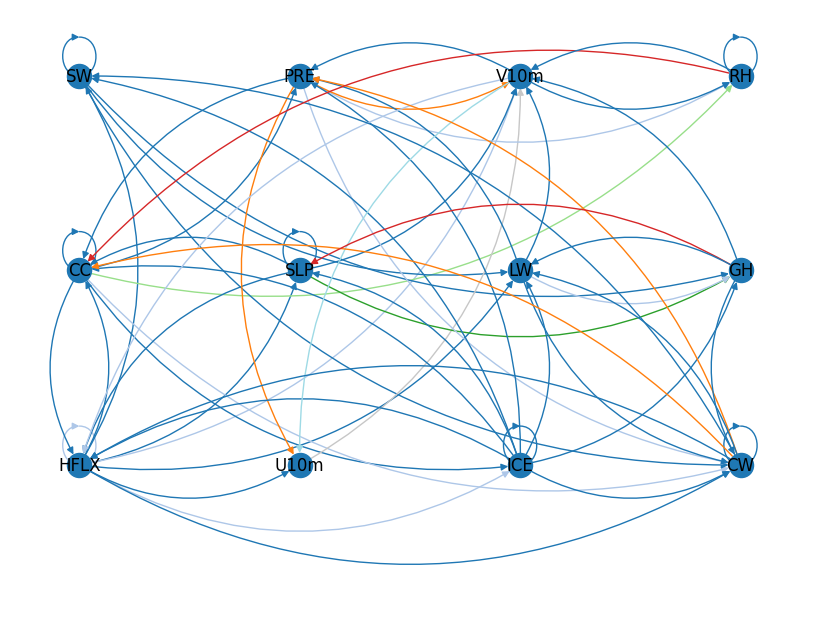

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
nx.draw(G_2d_s1, pos_2d_s1, cmap = plt.get_cmap('jet'), edge_cmap= plt.cm.tab20, edge_color=weights_2d_s1, with_labels = True, connectionstyle='arc3, rad = 0.3')
#nx.draw_networkx(G, with_labels = True)
plt.show()

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.


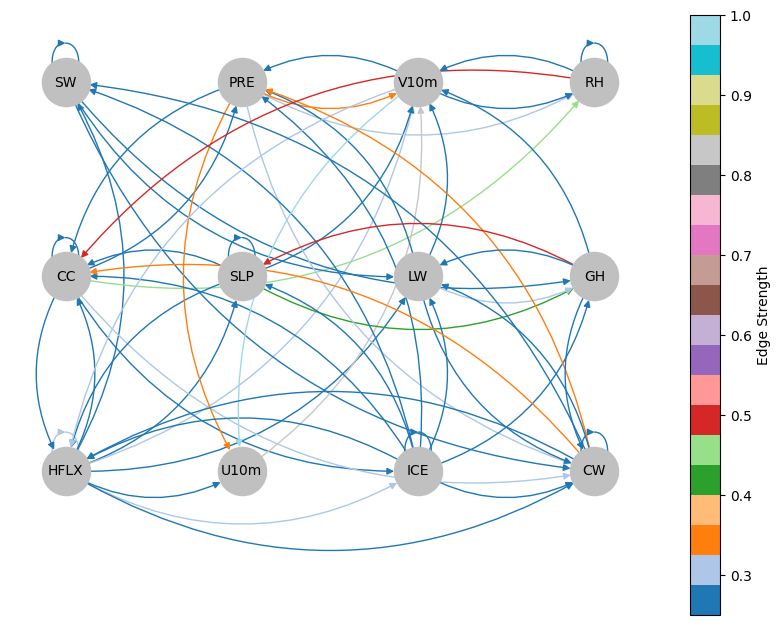

In [ ]:
import matplotlib.pyplot as plt # new
import matplotlib as mpl

plt.figure(figsize=(8, 6))
nx.draw(G_2d_s1, pos_2d_s1,  edge_cmap= plt.cm.tab20,  #cmap = plt.get_cmap('jet'),
        font_size=10, node_size=1200, node_color='#c0c0c0', #[30,30,30,30,30],
        edge_color=weights_2d_s1, with_labels = True, connectionstyle='arc3, rad = 0.3')
#nx.draw_networkx(G, with_labels = True)
plt.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(0.25, 1), cmap=plt.cm.tab20),
              orientation='vertical', label='Edge Strength')
plt.show()

In [ ]:
pred_graph_s1

array([[1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0.],
       [1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1.],
       [1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0.],
       [1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.],
       [1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.]])

In [ ]:
true_graph

array([[0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.],
       [1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.]])

In [ ]:
np.savetxt('proposed-summary-adj-mat.csv', pred_graph_s1, delimiter=",")

In [ ]:
cdt.metrics.SHD(true_graph, pred_graph_s1)

54.0

In [ ]:
true_values = true_graph
predictions = pred_graph_s1

N = true_values.shape[1]*true_values.shape[0]
accuracy = (true_values == predictions).sum() / N
TP = ((predictions == 1) & (true_values == 1)).sum()
FP = ((predictions == 1) & (true_values == 0)).sum()
TN = ((predictions == 0) & (true_values == 0)).sum()
FN = ((predictions == 0) & (true_values == 1)).sum()
precision = TP / (TP+FP)
recall = TP / (TP + FN)
FDR = FP / (FP + TP)
F1 = 2 * (precision * recall) / (precision + recall)
print('Accuracy: {}, Precision: {}, Recall: {}, FDR: {}, F1 Score: {}'.format(accuracy, precision, recall, FDR,F1))

Accuracy: 0.625, Precision: 0.43333333333333335, Recall: 0.5652173913043478, FDR: 0.5666666666666667, F1 Score: 0.49056603773584906


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(true_graph.reshape(-1), pred_graph_s1.reshape(-1), normalize=True)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(true_graph.reshape(-1), pred_graph_s1.reshape(-1))
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(true_graph.reshape(-1), pred_graph_s1.reshape(-1))
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(true_graph.reshape(-1), pred_graph_s1.reshape(-1))
print("F1-Score:", f1)

Accuracy: 0.625
Precision: 0.43333333333333335
Recall (Sensitivity): 0.5652173913043478
F1-Score: 0.49056603773584906


#Non-stationarity test

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.stattools import adfuller, kpss, grangercausalitytests
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df_2D_data_sea_ice.describe()

,HFLX,SW,LW,SLP,PRE,RH,U10m,V10m,ICE,CC,CW,GH
count,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,4.680000e+02,468.000000,468.000000,468.000000
mean,-26.874346,96.953931,242.337021,1012.893467,1.105544,72.104738,0.041908,-0.157763,1.167533e+07,80.537043,64.795709,6019.000708
std,9.821787,88.790765,43.975729,3.248154,0.261019,2.972831,0.553540,0.273238,3.188123e+06,3.353947,26.659489,157.006344
min,-49.470240,1.262922,177.717409,1002.284237,0.643538,65.818742,-1.628848,-1.021780,3.629315e+06,71.443369,30.517311,5715.785656
25%,-32.883534,15.355906,198.746582,1010.692924,0.879114,69.608681,-0.329965,-0.335606,9.122044e+06,77.921696,40.885785,5880.024675
50%,-24.432625,70.642622,236.331702,1012.274897,1.077653,72.402146,0.051633,-0.168854,1.233371e+07,80.553541,56.984975,5987.554004
75%,-19.551167,168.779361,285.822302,1014.937532,1.332351,74.478732,0.405515,0.028457,1.450544e+07,83.475556,87.654734,6162.982184
max,-7.993992,252.615348,313.595078,1023.922429,1.693416,78.605315,1.535005,0.760002,1.623149e+07,86.478277,126.256473,6299.356484


In [ ]:
df_2D_data_sea_ice.columns

Index(['HFLX', 'SW', 'LW', 'SLP', 'PRE', 'RH', 'U10m', 'V10m', 'ICE', 'CC',
       'CW', 'GH'],
      dtype='object')

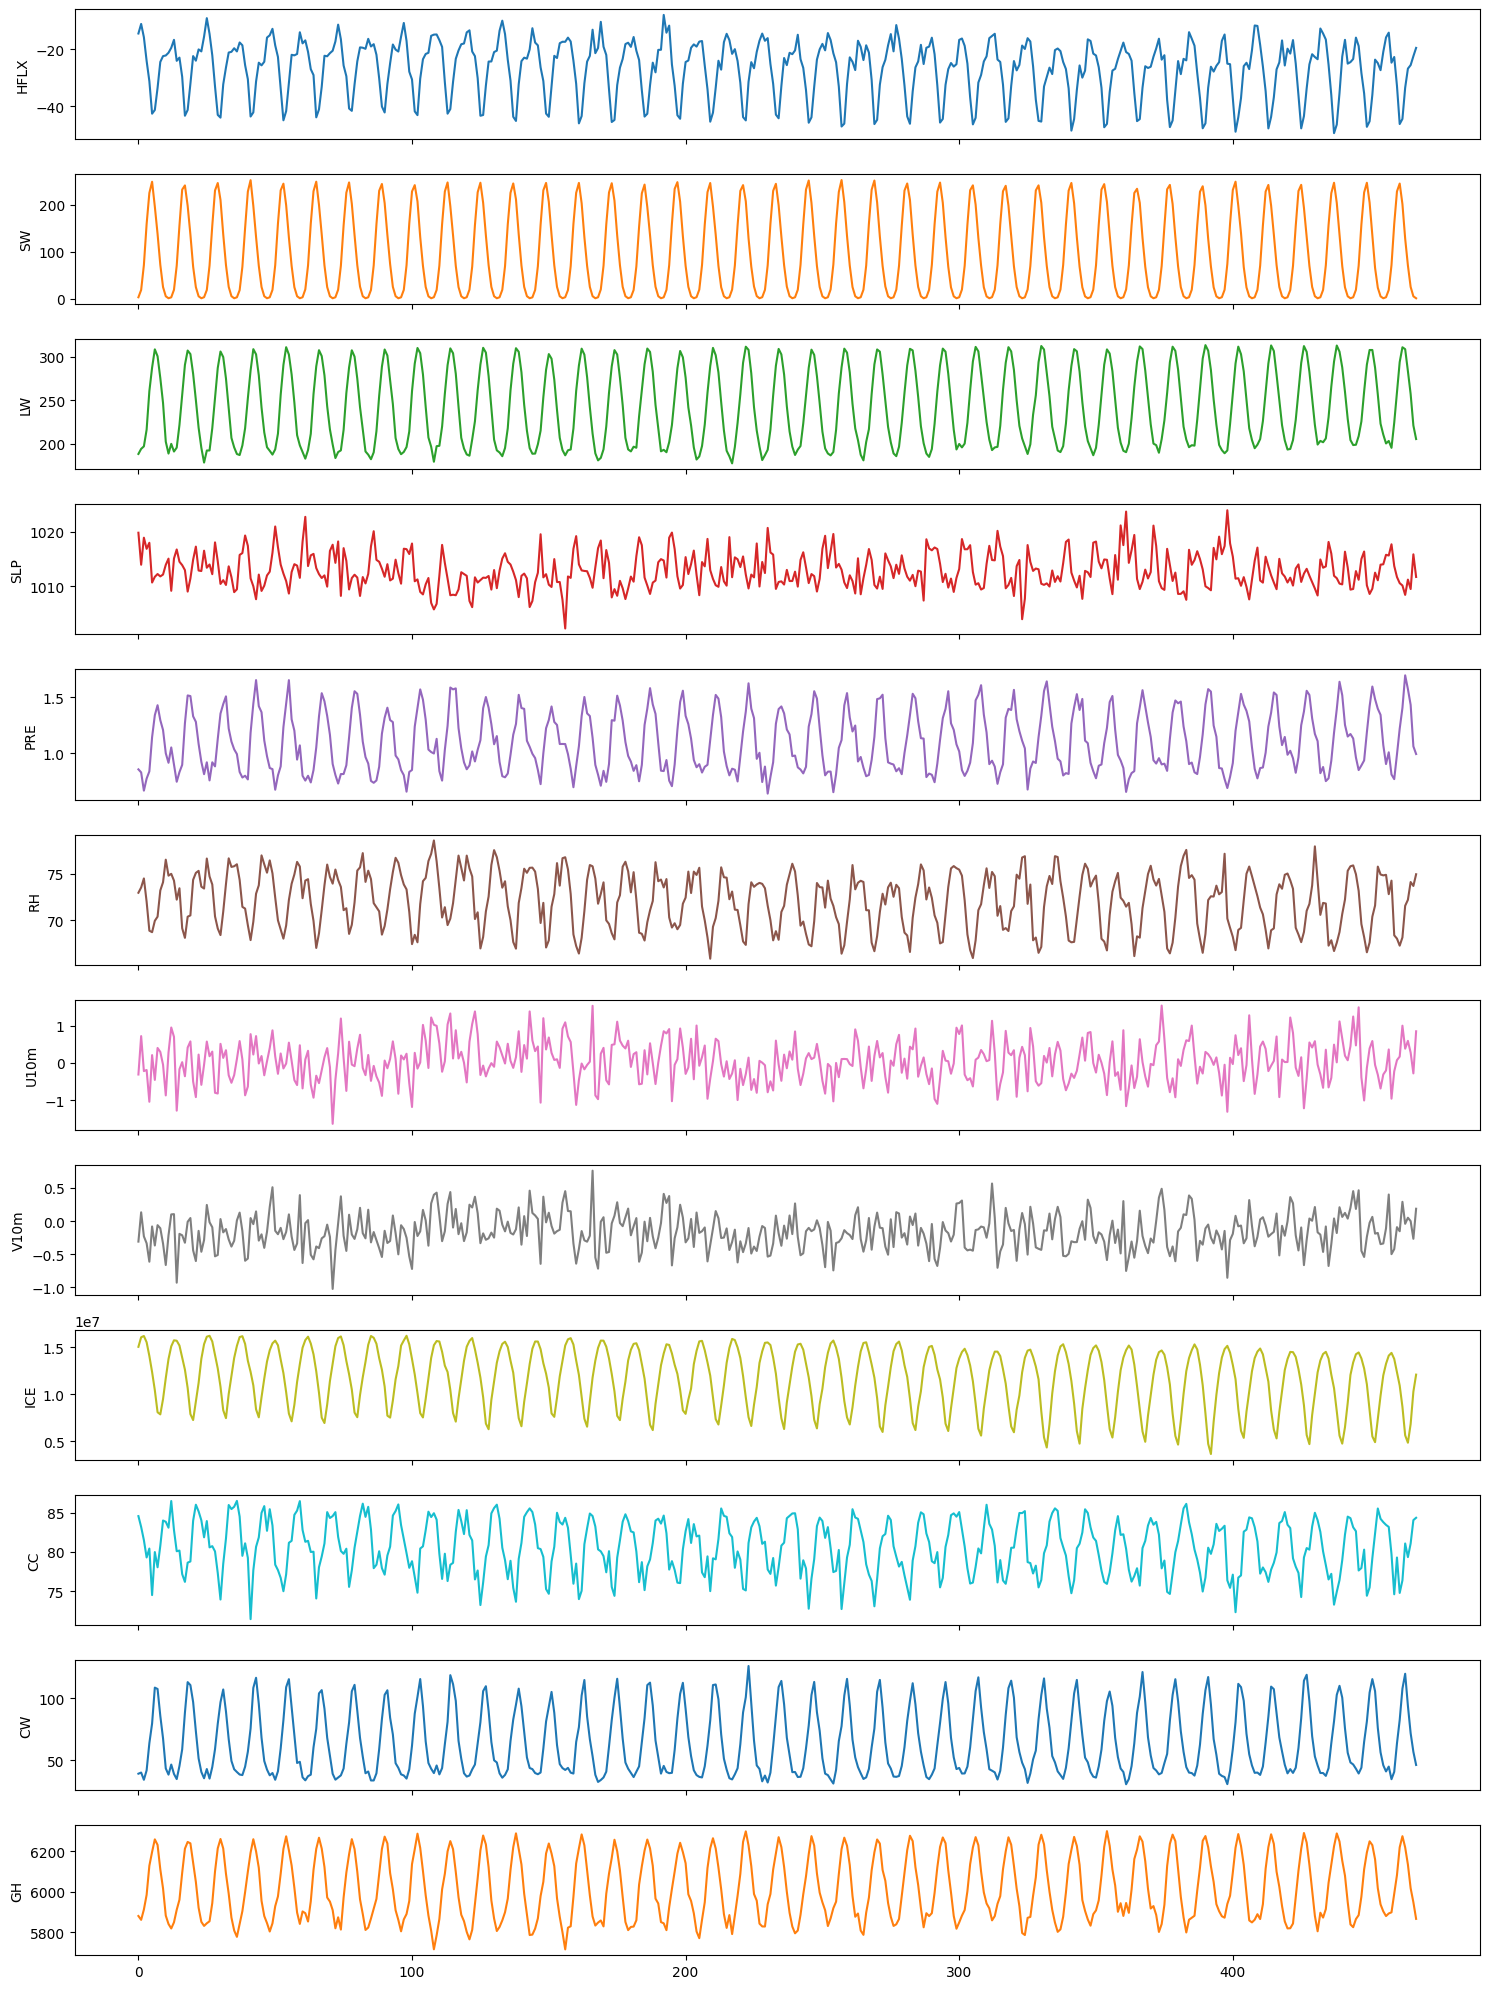

In [ ]:
fig,ax = plt.subplots(12, figsize=(15,20), sharex=True)
plot_cols = ['HFLX', 'SW', 'LW', 'SLP', 'PRE', 'RH', 'U10m', 'V10m', 'ICE', 'CC', 'CW', 'GH']
df_2D_data_sea_ice[plot_cols].plot(subplots=True, legend=False, ax=ax)
for a in range(len(ax)):
    ax[a].set_ylabel(plot_cols[a])
ax[-1].set_xlabel('')
plt.tight_layout()
plt.show()

####ADF Test for Stationarity

Null hypothesis: The time series has a unit root and is not stationary.

If failed to be rejected, it suggests the time series is not stationarity.

If p-values is higher than 0.05 alpha level, we cannot reject the null hypothesis. So the time series is not stationary.

In [ ]:
#ADF Test for non-stationarity
def adf_test(data_df):
    test_stat, p_val = [], []
    cv_1pct, cv_5pct, cv_10pct = [], [], []
    stationary = []
    for c in data_df.columns:
        adf_res = adfuller(data_df[c].dropna())
        test_stat.append(adf_res[0])
        p_val.append(adf_res[1])
        cv_1pct.append(adf_res[4]['1%'])
        cv_5pct.append(adf_res[4]['5%'])
        cv_10pct.append(adf_res[4]['10%'])
        if adf_res[1] > 0.05:
          stationary.append('No')
        else:
          stationary.append('Yes')
    adf_res_df = pd.DataFrame({'Test statistic': test_stat,
                               'p-value': p_val,
                               'Critical value - 1%': cv_1pct,
                               'Critical value - 5%': cv_5pct,
                               'Critical value - 10%': cv_10pct,
                               'Stationary': stationary},
                             index=data_df.columns).T
    adf_res_df = adf_res_df.round(4)
    return adf_res_df

In [ ]:
adf_test(df_2D_data_sea_ice)

,HFLX,CC,SW,U10m,SLP,PRE,ICE,LW,V10m,CW,GH,RH
Test statistic,-2.564465,-4.102053,-5.36903,-14.44993,-4.866682,-3.956893,-0.984991,-1.997453,-14.690604,-3.477,-3.283567,-2.49083
p-value,0.100566,0.000961,0.000004,0.0,0.00004,0.001654,0.758699,0.287691,0.0,0.008598,0.015629,0.117722
Critical value - 1%,-3.444772,-3.444966,-3.444966,-3.444461,-3.4449,-3.444998,-3.444804,-3.444868,-3.444461,-3.444836,-3.444772,-3.444836
Critical value - 5%,-2.867899,-2.867984,-2.867984,-2.867762,-2.867956,-2.867999,-2.867913,-2.867941,-2.867762,-2.867927,-2.867899,-2.867927
Critical value - 10%,-2.570157,-2.570203,-2.570203,-2.570084,-2.570187,-2.57021,-2.570165,-2.57018,-2.570084,-2.570172,-2.570157,-2.570172
Stationary,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No


#### KPSS Test for Stationary

Null hypothesis: The time series is stationary.

If the p-value is less than 0.05 alpha level, we can reject the null hypothesis and derive that the time series is not stationary.

In [ ]:
def kpss_test(data_df):
    test_stat, p_val = [], []
    cv_1pct, cv_2p5pct, cv_5pct, cv_10pct = [], [], [], []
    stationary = []
    for c in data_df.columns:
        kpss_res = kpss(data_df[c].dropna())#, regression='ct')
        test_stat.append(kpss_res[0])
        p_val.append(kpss_res[1])
        cv_1pct.append(kpss_res[3]['1%'])
        cv_2p5pct.append(kpss_res[3]['2.5%'])
        cv_5pct.append(kpss_res[3]['5%'])
        cv_10pct.append(kpss_res[3]['10%'])
        if kpss_res[1] > 0.05:
          stationary.append('Yes')
        else:
          stationary.append('No')
    kpss_res_df = pd.DataFrame({'Test statistic': test_stat,
                               'p-value': p_val,
                               'Critical value - 1%': cv_1pct,
                               'Critical value - 2.5%': cv_2p5pct,
                               'Critical value - 5%': cv_5pct,
                               'Critical value - 10%': cv_10pct,
                               'Stationary': stationary},
                             index=data_df.columns).T
    kpss_res_df = kpss_res_df.round(4)
    return kpss_res_df

In [ ]:
kpss_test(df_2D_data_sea_ice)

,HFLX,CC,SW,U10m,SLP,PRE,ICE,LW,V10m,CW,GH,RH
Test statistic,0.416489,0.566524,0.011973,0.133169,0.106426,0.348147,1.742112,0.272819,0.155493,0.119408,0.197641,1.012454
p-value,0.070048,0.026684,0.1,0.1,0.1,0.099505,0.01,0.1,0.1,0.1,0.1,0.01
Critical value - 1%,0.739,0.739,0.739,0.739,0.739,0.739,0.739,0.739,0.739,0.739,0.739,0.739
Critical value - 2.5%,0.574,0.574,0.574,0.574,0.574,0.574,0.574,0.574,0.574,0.574,0.574,0.574
Critical value - 5%,0.463,0.463,0.463,0.463,0.463,0.463,0.463,0.463,0.463,0.463,0.463,0.463
Critical value - 10%,0.347,0.347,0.347,0.347,0.347,0.347,0.347,0.347,0.347,0.347,0.347,0.347
Stationary,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,No


# Ground Truth

In [ ]:
['HFLX','CC','SW','U10m','SLP', 'PRE','ICE', 'LW','V10m','CW','GH','RH']
   0      1    2     3      4.    5.    6.     7.    8.    9.   10.  11

In [ ]:
true_graph = np.zeros((12,12))
true_graph[0,5]=1
true_graph[0,6]=1
true_graph[0,9]=1
true_graph[0,1]=1
true_graph[0,4]=1
true_graph[0,3]=1
true_graph[0,8]=1

true_graph[1,2]=1
true_graph[1,7]=1
true_graph[1,11]=1
true_graph[1,0]=1

true_graph[2,6]=1

true_graph[3,6]=1
true_graph[3,0]=1

true_graph[4,3]=1
true_graph[4,8]=1
true_graph[4,0]=1
true_graph[4,6]=1
true_graph[4,10]=1
true_graph[4,11]=1

true_graph[5,9]=1
true_graph[5,1]=1
true_graph[5,6]=1
true_graph[5,11]=1
true_graph[5,0]=1

true_graph[6,0]=1
true_graph[6,2]=1
true_graph[6,7]=1
true_graph[6,4]=1
true_graph[6,3]=1
true_graph[6,8]=1

true_graph[7,6]=1

true_graph[8,0]=1
true_graph[8,6]=1

true_graph[9,0]=1
true_graph[9,2]=1
true_graph[9,7]=1
true_graph[9,11]=1
true_graph[9,5]=1

true_graph[10,11]=1
true_graph[10,4]=1
true_graph[10,7]=1

true_graph[11,5]=1
true_graph[11,7]=1
true_graph[11,1]=1
true_graph[11,9]=1

true_graph

array([[0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.],
       [1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.]])

In [ ]:
#total = np.sum(true_graph, weights=true_graph>0)
total = np.sum(true_graph[ np.where( true_graph > 0 )])
total

46.0

In [ ]:
import networkx as nx
G_2d_s1 = nx.DiGraph()

#nodes_2d_s = ['HFLX', 'SW', 'LW', 'SLP', 'PRE', 'RH', 'U10m', 'V10m', 'ICE', 'CC','CW', 'GH']
#nodes_r_2d_s = ['HFLX', 'SW', 'LW', 'SLP', 'PRE', 'RH', 'U10m', 'V10m', 'ICE', 'CC','CW', 'GH']
nodes_2d_s = ['HFLX', 'CC', 'SW', 'U10m', 'SLP', 'PRE', 'ICE', 'LW', 'V10m', 'CW','GH', 'RH']
nodes_r_2d_s = ['HFLX', 'CC', 'SW', 'U10m', 'SLP', 'PRE', 'ICE', 'LW', 'V10m', 'CW','GH', 'RH']
edges_2d_s1 = []
pred_graph_s1 = np.zeros((12,12))

In [ ]:
for i in range (0, 12):
  G_2d_s1.add_node(nodes_2d_s[i],pos=(int(i/3)+1,(i%3)+1))

In [ ]:
for i in range(0, 12):
  for j in range (0, 12):
    if true_graph[i,j] > 0.3:
      col = np.round(true_graph[i,j], 2)
      #print(i,j, matrix_2d_2d_s[j,i])
      G_2d_s1.add_edge(nodes_2d_s[i], nodes_r_2d_s[j], weight=col)
      pred_graph_s1[i, j]=1


In [ ]:
pos_2d_s1=nx.get_node_attributes(G_2d_s1,'pos')
pos_2d_s1

{'HFLX': (1, 1),
 'CC': (1, 2),
 'SW': (1, 3),
 'U10m': (2, 1),
 'SLP': (2, 2),
 'PRE': (2, 3),
 'ICE': (3, 1),
 'LW': (3, 2),
 'V10m': (3, 3),
 'CW': (4, 1),
 'GH': (4, 2),
 'RH': (4, 3)}

In [ ]:
weights_2d_s1 = nx.get_edge_attributes(G_2d_s1,'weight').values()

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.


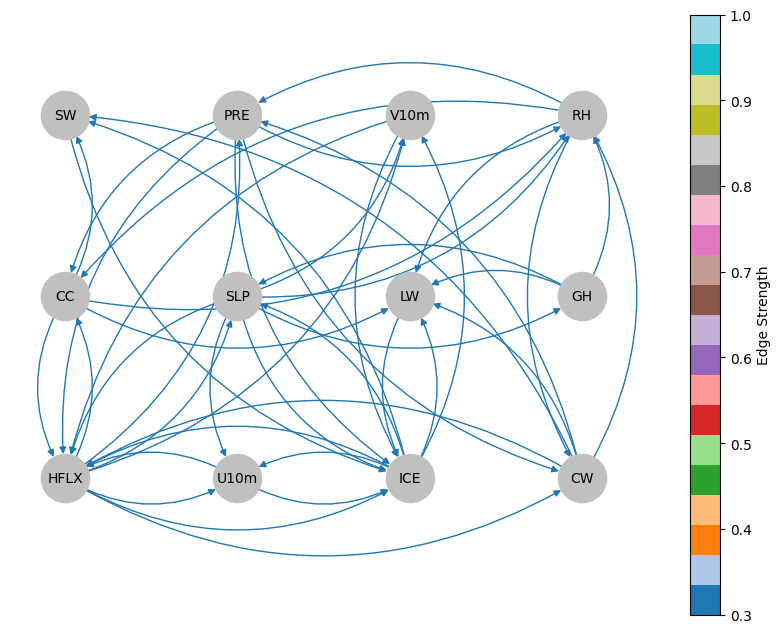

In [ ]:
import matplotlib.pyplot as plt # new
import matplotlib as mpl

plt.figure(figsize=(8, 6))
nx.draw(G_2d_s1, pos_2d_s1,  edge_cmap= plt.cm.tab20,  #cmap = plt.get_cmap('jet'),
        font_size=10, node_size=1200, node_color='#c0c0c0', #[30,30,30,30,30],
        edge_color=weights_2d_s1, with_labels = True, connectionstyle='arc3, rad = 0.3')
#nx.draw_networkx(G, with_labels = True)
plt.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(0.3, 1), cmap=plt.cm.tab20),
              orientation='vertical', label='Edge Strength')
plt.show()